# 1) Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam

import os
import pandas as pd
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2
from sklearn.utils import shuffle
import numpy as np


pd.set_option("display.max_rows", 30)
pd.set_option('max_colwidth', 400)

In [5]:
val_Data_Directory_df = pd.read_hdf('val_Data_Directory_df.h5')
train_Data_Directory_df = pd.read_hdf('train_Data_Directory_df.h5')
test_Data_Directory_df = pd.read_hdf('test_Data_Directory_df.h5')
class_df = pd.read_hdf('class_df.h5')

In [3]:
class_df

,Class
0,cat
1,dog


In [4]:
val_Data_Directory_df.head(-5)

,Directory,Set,Class,Class_ID,Resized_Directory
0,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.100.jpg,val,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\val\0.jpg
1,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.1000.jpg,val,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\val\1.jpg
2,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.10000.jpg,val,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\val\2.jpg
3,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.10010.jpg,val,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\val\3.jpg
4,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.10017.jpg,val,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\val\4.jpg
...,...,...,...,...,...
4990,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9961.jpg,val,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\val\4990.jpg
4991,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9967.jpg,val,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\val\4991.jpg
4992,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9974.jpg,val,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\val\4992.jpg
4993,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9976.jpg,val,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\val\4993.jpg


In [5]:
train_Data_Directory_df.head(-5)

,Directory,Set,Class,Class_ID,Resized_Directory
0,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.0.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\0.jpg
1,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.1.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\1.jpg
2,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.10.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\2.jpg
3,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.10001.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\3.jpg
4,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.10002.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\4.jpg
...,...,...,...,...,...
19990,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.9988.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\19990.jpg
19991,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.9989.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\19991.jpg
19992,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.999.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\19992.jpg
19993,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.9990.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\19993.jpg


In [6]:
test_Data_Directory_df.head()

,Directory,Set,ID,Class,Class_ID,Resized_Directory
0,d:\Files\GitHub\General_Image_Classifier\Datasets\test\1.jpg,test,1,NaN,NaN,d:\Files\GitHub\General_Image_Classifier\processing\test\0.jpg
1,d:\Files\GitHub\General_Image_Classifier\Datasets\test\2.jpg,test,2,NaN,NaN,d:\Files\GitHub\General_Image_Classifier\processing\test\1.jpg
2,d:\Files\GitHub\General_Image_Classifier\Datasets\test\3.jpg,test,3,NaN,NaN,d:\Files\GitHub\General_Image_Classifier\processing\test\2.jpg
3,d:\Files\GitHub\General_Image_Classifier\Datasets\test\4.jpg,test,4,NaN,NaN,d:\Files\GitHub\General_Image_Classifier\processing\test\3.jpg
4,d:\Files\GitHub\General_Image_Classifier\Datasets\test\5.jpg,test,5,NaN,NaN,d:\Files\GitHub\General_Image_Classifier\processing\test\4.jpg


# Show Image

In [7]:
def image_view(file_path): 
    im = cv2.imread(file_path)
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.title(label = file_path.split("\\")[-1] + ' (' + file_path.split("\\")[-2] + ')')
    plt.axis('off')

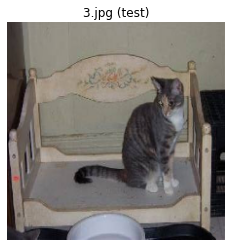

In [8]:
image_directory = test_Data_Directory_df['Directory'][2]
image_view(image_directory)

# 2) Randomize order of train datasets

In [11]:
train_Data_Directory_df = shuffle(train_Data_Directory_df, random_state = 0)
train_Data_Directory_df.reset_index(drop=True, inplace=True)
train_Data_Directory_df

,Directory,Set,Class,Class_ID,Resized_Directory
0,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.4747.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\5323.jpg
1,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.7841.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\8046.jpg
2,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.1958.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\12835.jpg
3,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.9674.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\9700.jpg
4,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.4645.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\5225.jpg
...,...,...,...,...,...
19995,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.11401.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\11234.jpg
19996,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.3098.jpg,train,cat,0,d:\Files\GitHub\General_Image_Classifier\processing\train\3844.jpg
19997,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.10377.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\10344.jpg
19998,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.4381.jpg,train,dog,1,d:\Files\GitHub\General_Image_Classifier\processing\train\14974.jpg


# 3) Prep the data for ML

In [12]:
img_size = 64

In [13]:
x_train = []
for file_path in train_Data_Directory_df['Resized_Directory']:
    im =  cv2.imread(file_path)
    x_train.append(im)
x_train = np.array(x_train).reshape(-1, img_size, img_size, 3)

In [14]:
y_train = np.array(train_Data_Directory_df.Class_ID)

In [15]:
x_val = []
for file_path in val_Data_Directory_df['Resized_Directory']:
    im =  cv2.imread(file_path)
    x_val.append(im)
x_val = np.array(x_val).reshape(-1, img_size, img_size, 3)

In [16]:
y_val = np.array(val_Data_Directory_df.Class_ID)

## Normalize the data

In [17]:
x_train = x_train/255.0
x_val = x_val/255.0

In [18]:
%store x_train
%store x_val
%store y_val
%store y_train

Stored 'x_train' (ndarray)
Stored 'x_val' (ndarray)
Stored 'y_val' (ndarray)
Stored 'y_train' (ndarray)


# 4) Set up the convnet

### If you encounter out of memory errors, please restart kernel and run the import libraries cell and this function in order to run the different model architectures

In [2]:
%store -r x_train
%store -r x_val
%store -r y_val
%store -r y_train
x_train.shape[1:]
def plot_hist(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# Model 1

Epoch 1/50
625/625 [==============================] - 10s 12ms/step - loss: 0.6420 - binary_accuracy: 0.6234 - val_loss: 0.5877 - val_binary_accuracy: 0.6898
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.5543 - binary_accuracy: 0.7193 - val_loss: 0.5412 - val_binary_accuracy: 0.7286
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 0.5158 - binary_accuracy: 0.7481 - val_loss: 0.5182 - val_binary_accuracy: 0.7454
Epoch 4/50
625/625 [==============================] - 7s 11ms/step - loss: 0.4887 - binary_accuracy: 0.7660 - val_loss: 0.5122 - val_binary_accuracy: 0.7484
Epoch 5/50
625/625 [==============================] - 7s 11ms/step - loss: 0.4694 - binary_accuracy: 0.7794 - val_loss: 0.5100 - val_binary_accuracy: 0.7520
Epoch 6/50
625/625 [==============================] - 7s 11ms/step - loss: 0.4554 - binary_accuracy: 0.7854 - val_loss: 0.4855 - val_binary_accuracy: 0.7750
Epoch 7/50
625/625 [==============================] - 7s 

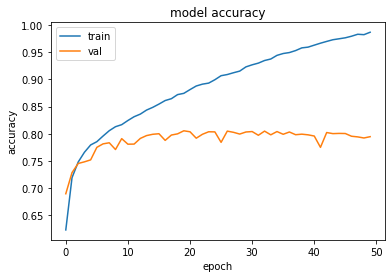

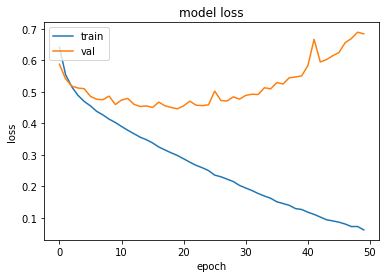

In [22]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=(Adam)(learning_rate=0.0001),
              metrics=['binary_accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))
print(model.optimizer.get_config())
plot_hist(history)

# Model 2 Architecture

Epoch 1/40
625/625 [==============================] - 11s 12ms/step - loss: 0.6513 - binary_accuracy: 0.6088 - val_loss: 0.6091 - val_binary_accuracy: 0.6706
Epoch 2/40
625/625 [==============================] - 7s 11ms/step - loss: 0.5687 - binary_accuracy: 0.7052 - val_loss: 0.5648 - val_binary_accuracy: 0.7098
Epoch 3/40
625/625 [==============================] - 7s 11ms/step - loss: 0.5335 - binary_accuracy: 0.7347 - val_loss: 0.5387 - val_binary_accuracy: 0.7270
Epoch 4/40
625/625 [==============================] - 7s 11ms/step - loss: 0.5032 - binary_accuracy: 0.7561 - val_loss: 0.5183 - val_binary_accuracy: 0.7452
Epoch 5/40
625/625 [==============================] - 7s 11ms/step - loss: 0.4757 - binary_accuracy: 0.7747 - val_loss: 0.4962 - val_binary_accuracy: 0.7612
Epoch 6/40
625/625 [==============================] - 7s 11ms/step - loss: 0.4527 - binary_accuracy: 0.7891 - val_loss: 0.4868 - val_binary_accuracy: 0.7720
Epoch 7/40
625/625 [==============================] - 7s 

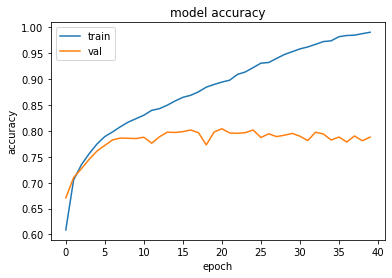

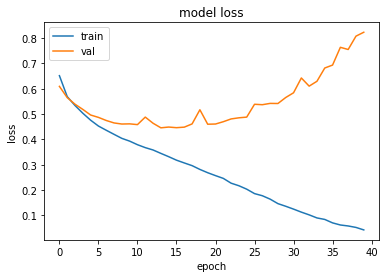

In [3]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=(Adam)(learning_rate=0.0001),
              metrics=['binary_accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_val, y_val))
print(model.optimizer.get_config())
plot_hist(history)

# Model 3 Architecture

Epoch 1/150
625/625 [==============================] - 12s 14ms/step - loss: 0.6921 - binary_accuracy: 0.5207 - val_loss: 0.6870 - val_binary_accuracy: 0.5610
Epoch 2/150
625/625 [==============================] - 8s 13ms/step - loss: 0.6691 - binary_accuracy: 0.5915 - val_loss: 0.6660 - val_binary_accuracy: 0.6032
Epoch 3/150
625/625 [==============================] - 8s 13ms/step - loss: 0.6374 - binary_accuracy: 0.6413 - val_loss: 0.6202 - val_binary_accuracy: 0.6670
Epoch 4/150
625/625 [==============================] - 8s 12ms/step - loss: 0.6101 - binary_accuracy: 0.6719 - val_loss: 0.5984 - val_binary_accuracy: 0.6924
Epoch 5/150
625/625 [==============================] - 8s 13ms/step - loss: 0.5883 - binary_accuracy: 0.6921 - val_loss: 0.5851 - val_binary_accuracy: 0.6886
Epoch 6/150
625/625 [==============================] - 8s 13ms/step - loss: 0.5635 - binary_accuracy: 0.7109 - val_loss: 0.5603 - val_binary_accuracy: 0.7236
Epoch 7/150
625/625 [==============================

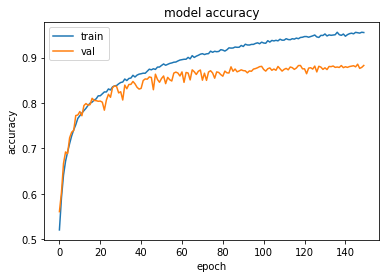

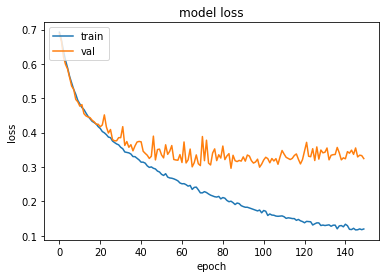

In [3]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=(Adam)(learning_rate=0.0001),
              metrics=['binary_accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=150, validation_data=(x_val, y_val))
print(model.optimizer.get_config())
plot_hist(history)

# Model 4 Architecture

Epoch 1/300
625/625 [==============================] - 15s 16ms/step - loss: 0.6946 - binary_accuracy: 0.5074 - val_loss: 0.6926 - val_binary_accuracy: 0.5084
Epoch 2/300
625/625 [==============================] - 10s 15ms/step - loss: 0.6925 - binary_accuracy: 0.5113 - val_loss: 0.6917 - val_binary_accuracy: 0.5176
Epoch 3/300
625/625 [==============================] - 10s 15ms/step - loss: 0.6818 - binary_accuracy: 0.5632 - val_loss: 0.6673 - val_binary_accuracy: 0.5826
Epoch 4/300
625/625 [==============================] - 10s 16ms/step - loss: 0.6570 - binary_accuracy: 0.6155 - val_loss: 0.6620 - val_binary_accuracy: 0.5938
Epoch 5/300
625/625 [==============================] - 10s 17ms/step - loss: 0.6454 - binary_accuracy: 0.6299 - val_loss: 0.6594 - val_binary_accuracy: 0.5988
Epoch 6/300
625/625 [==============================] - 11s 18ms/step - loss: 0.6346 - binary_accuracy: 0.6406 - val_loss: 0.6462 - val_binary_accuracy: 0.6028
Epoch 7/300
625/625 [=========================

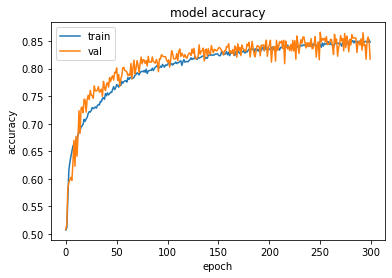

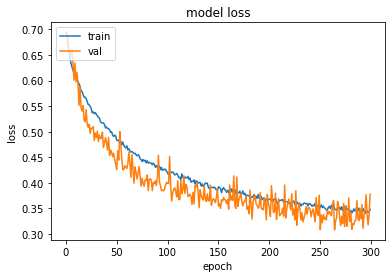

In [3]:
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.2),
  layers.RandomTranslation(0.2, 0.2, fill_mode='wrap'),
  layers.RandomContrast(0.2)
])

model = Sequential()

model.add(data_augmentation)

model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=(Adam)(learning_rate=0.00012),
              metrics=['binary_accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=300, validation_data=(x_val, y_val))
print(model.optimizer.get_config())
plot_hist(history)

# Predict with the test data in the test_data_directory

In [7]:
img_size = 64
x_test = []
for file_path in test_Data_Directory_df['Resized_Directory']:
    im =  cv2.imread(file_path)
    x_test.append(im)
x_test = np.array(x_test).reshape(-1, img_size, img_size, 3)

In [8]:
predictions = model.predict(x_test)

In [14]:
class_df

,Class
0,cat
1,dog


In [53]:
submissions_df = pd.DataFrame()
class_id_predictions = [int(x[0]) for x in predictions.round().tolist()]
submissions_df = class_df.iloc[class_id_predictions].reset_index(drop=True)
submissions_df['label'] = pd.Series(class_id_predictions)
submissions_df.index += 1
submissions_df.rename_axis('id')
submissions_df = submissions_df[['label', 'Class']].rename_axis('id')
submissions_df

,label,Class
id,,
1,0,cat
2,1,dog
3,0,cat
4,0,cat
5,1,dog
...,...,...
496,0,cat
497,0,cat
498,0,cat


In [54]:
submissions_df.to_csv('submission.csv')